# Problem Statement
### - To Help the Data team at Delhivery to understand and process the data coming out of data engineering pipelines.
###   - Cleaning, manipulating the data to get useful data out of raw fields
###   - Make sense out of the raw data and help the data science team to build forecasting models on it

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_csv('delhivery_data.txt')
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [3]:
data.shape

(144867, 24)

In [4]:
data.size

3476808

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

### conversion of categorical attributes to 'category'

In [6]:
data['data']=data['data'].astype('category')
data['route_type']=data['route_type'].astype('category')

### Dropping unknown columns

In [7]:
data.drop(['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'],axis=1, inplace=True)
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,144867.0,961.262986,1037.012769,20.000000,161.000000,449.000000,1634.000000,7898.000000
actual_distance_to_destination,144867.0,234.073372,344.990009,9.000045,23.355874,66.126571,286.708875,1927.447705
actual_time,144867.0,416.927527,598.103621,9.000000,51.000000,132.000000,513.000000,4532.000000
osrm_time,144867.0,213.868272,308.011085,6.000000,27.000000,64.000000,257.000000,1686.000000
osrm_distance,144867.0,284.771297,421.119294,9.008200,29.914700,78.525800,343.193250,2326.199100
segment_actual_time,144867.0,36.196111,53.571158,-244.000000,20.000000,29.000000,40.000000,3051.000000
segment_osrm_time,144867.0,18.507548,14.775960,0.000000,11.000000,17.000000,22.000000,1611.000000
segment_osrm_distance,144867.0,22.829020,17.860660,0.000000,12.070100,23.513000,27.813250,2191.403700


In [9]:
data.describe(include='object').T

,count,unique,top,freq
trip_creation_time,144867,14817,2018-09-28 05:23:15.359220,101
route_schedule_uuid,144867,1504,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812
trip_uuid,144867,14817,trip-153811219535896559,101
source_center,144867,1508,IND000000ACB,23347
source_name,144574,1498,Gurgaon_Bilaspur_HB (Haryana),23347
destination_center,144867,1481,IND000000ACB,15192
destination_name,144606,1468,Gurgaon_Bilaspur_HB (Haryana),15192
od_start_time,144867,26369,2018-09-21 18:37:09.322207,81
od_end_time,144867,26369,2018-09-24 09:59:15.691618,81


### Converting time features from float to datetime

In [10]:
data['trip_creation_time']=pd.to_datetime(data['trip_creation_time'])
data['od_start_time']=pd.to_datetime(data['od_start_time'])
data['od_end_time']=pd.to_datetime(data['od_end_time'])

In [11]:
data['data'].value_counts()

#Most of the data is for testing than for training.

training    104858
test         40009
Name: data, dtype: int64

In [12]:
data['route_type'].value_counts()

# Most common route type is Carting

FTL        99660
Carting    45207
Name: route_type, dtype: int64

In [13]:
data['trip_creation_time'].min(), data['od_end_time'].max()

(Timestamp('2018-09-12 00:00:16.535741'),
 Timestamp('2018-10-08 03:00:24.353479'))

In [14]:
# The data is given from the period '2018-09-12 00:00:16' to '2018-10-08 03:00:24'.

### Handling Missing values

In [15]:
data.isnull().sum() 

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

In [16]:
a=data.loc[data['source_name'].isnull()]
a.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                    3
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

In [17]:
center_ofmissing_source_name=a['source_center'].unique()
center_ofmissing_source_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [18]:
# Filling null values in Source name

count=1
for i in center_ofmissing_source_name:
    data.loc[data['source_center'] == i, 'source_name'] = data.loc[data['source_center'] == i, 'source_name'].replace(np.nan, f'source_{count}')
    count=+1
data.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                         0
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

In [19]:
b=data.loc[data['destination_name'].isnull()]
center_missing_destination_name=b['destination_center'].unique()
center_missing_destination_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [20]:
# Handling null values in destination name

count=1
for i in center_missing_destination_name:
    data.loc[data['destination_center'] == i, 'destination_name'] = data.loc[data['destination_center'] == i, 'destination_name'].replace(np.nan, f'destination_{count}')
    count=+1
data.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

## Merging DATA

### Merging data based on trip_uuid, source_center, destination_center

In [21]:
df1=data.groupby(['trip_uuid', 'source_center', 'destination_center'], as_index=False).agg({'trip_uuid':'first',
                                                                                            'data':'first',
                                                                           'trip_creation_time':'first',
                                                                           'route_schedule_uuid':'first',
                                                                           'route_type':'first',
                                                                           'source_name':'first',
                                                                           'destination_name':'last',
                                                                           'od_start_time' : 'first',
                                                                            'od_end_time' : 'last',
                                                                           'start_scan_to_end_scan' : 'first',
                                                                           'actual_distance_to_destination' : 'last',
                                                                           'actual_time' : 'last',
                                                                           'osrm_time' : 'last',
                                                                           'osrm_distance' : 'last',
                                                                           'segment_actual_time' : 'sum',
                                                                           'segment_osrm_time' : 'sum',
                                                                           'segment_osrm_distance' : 'sum'})

df1.head()

,source_center,destination_center,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,IND209304AAA,IND000000ACB,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,IND462022AAA,IND209304AAA,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,IND561203AAB,IND562101AAA,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,IND572101AAA,IND561203AAB,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,IND000000ACB,IND160002AAC,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408


### Feature Creation- total order time

In [22]:
df1['od_total_time']=df1['od_end_time']-df1['od_start_time']
df1['od_total_time'] = df1['od_total_time'].apply(lambda x : round(x.total_seconds() / 60.0, 0))
df1.sort_values(['trip_uuid','od_start_time'], ascending=True, inplace=True)
df1.head()

,source_center,destination_center,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_total_time
1,IND462022AAA,IND209304AAA,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,1000.0
0,IND209304AAA,IND000000ACB,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,1261.0
3,IND572101AAA,IND561203AAB,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,123.0
2,IND561203AAB,IND562101AAA,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,59.0
5,IND562132AAA,IND000000ACB,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1528.0,2072.8556,2700.0,1710.0,2227.5270,3100.0


### Merging data based on trip_uuid

In [23]:
df2=df1.groupby('trip_uuid',as_index=False).agg({'trip_uuid':'first',
                                                        'data':'first',
                                                        'trip_creation_time':'first',
                                                        'route_schedule_uuid':'first',
                                                        'route_type':'first',
                                                        'source_name':'first',
                                                        'destination_name':'last',
                                                        'start_scan_to_end_scan' : 'sum',
                                                        'actual_distance_to_destination' : 'sum',
                                                           'actual_time' : 'sum',
                                                           'osrm_time' : 'sum',
                                                           'osrm_distance' : 'sum',
                                                           'segment_actual_time' : 'sum',
                                                           'segment_osrm_time' : 'sum',
                                                         'segment_osrm_distance' : 'sum',
                                                          'od_total_time':'sum'})
df2.head()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_total_time
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,2261.0
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,182.0
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,3935.0
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,100.0
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,719.0


<AxesSubplot:xlabel='od_total_time', ylabel='Count'>

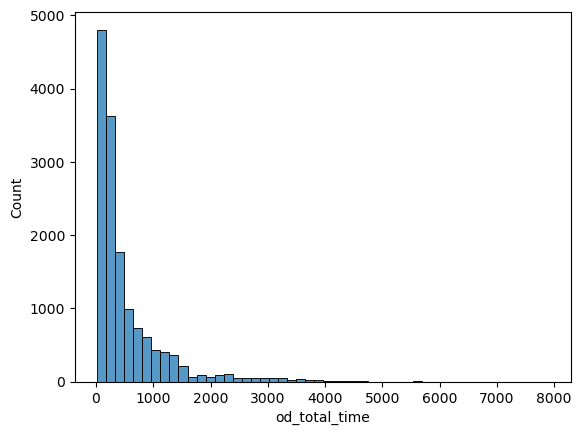

In [24]:
sns.histplot(data=df2, x='od_total_time', bins=50)

In [25]:
df2['od_total_time'].value_counts()

129.0     54
171.0     53
151.0     50
97.0      49
123.0     49
          ..
2874.0     1
1495.0     1
1666.0     1
1603.0     1
2183.0     1
Name: od_total_time, Length: 2213, dtype: int64

In [26]:
df2['od_total_time'].mean()

531.7971249240737

### Feature creation- splitting source name

In [27]:
df2['source_city'] = df2['source_name'].str.rstrip('_').str.split('_').str[0]
df2['source_place'] = df2['source_name'].str.rstrip('_').str.split('_').str[1]
df2['source_code1'] = df2['source_name'].str.split(' ').str[0]
df2['source_code']=df2['source_code1'].str.split('_').str[2]
df2.drop('source_code1',axis=1, inplace=True)
df2['source_state'] = df2['source_name'].str.rstrip(')').str.split('(').str[1]
df2.head(2)

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_total_time,source_city,source_place,source_code,source_state
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,2261.0,Bhopal,Trnsport,H,Madhya Pradesh
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,182.0,Tumkur,Veersagr,I,Karnataka


### Feature creation- from Destination name and Trip creation time

In [28]:
df2['destination_city'] = df2['destination_name'].str.rstrip('_').str.split('_').str[0]
df2['destination_place'] = df2['destination_name'].str.rstrip('_').str.split('_').str[1]
df2['destination_code1'] = df2['destination_name'].str.split(' ').str[0]
df2['destination_code']=df2['destination_code1'].str.split('_').str[2]
df2.drop('destination_code1',axis=1, inplace=True)
df2['destination_state'] = df2['destination_name'].str.rstrip(')').str.split('(').str[1]
df2['Year']=df2['trip_creation_time'].dt.year
df2['Month']=df2['trip_creation_time'].dt.month
df2['Day']=df2['trip_creation_time'].dt.day
df2['week_day']=df2['trip_creation_time'].dt.weekday
df2['time']=df2['trip_creation_time'].dt.time
df2['Hour']=df2['trip_creation_time'].dt.hour
df2.head()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,destination_city,destination_place,destination_code,destination_state,Year,Month,Day,week_day,time,Hour
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2259.0,824.732854,1562.0,...,Gurgaon,Bilaspur,HB,Haryana,2018,9,12,2,00:00:16.535741,0
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),180.0,73.186911,143.0,...,Chikblapur,ShntiSgr,D,Karnataka,2018,9,12,2,00:00:22.886430,0
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),3933.0,1927.404273,3347.0,...,Chandigarh,Mehmdpur,H,Punjab,2018,9,12,2,00:00:33.691250,0
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.0,17.175274,59.0,...,Mumbai,MiraRd,IP,Maharashtra,2018,9,12,2,00:01:00.113710,0
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),717.0,127.448500,341.0,...,Bellary,Dc (Karnataka),NaN,Karnataka,2018,9,12,2,00:02:09.740725,0


In [29]:
df2['trip_creation_time'].max()

Timestamp('2018-10-03 23:59:42.701692')

## In-depth analysis and feature engineering

### 1. Comparison & Visualization of time and distance with countplot
### 2. Checking relationship between aggregated fields through Hypothesis testing

### 1. Time taken between od_start_time and od_end_time

In [30]:
df2['od_total_time']

0        2261.0
1         182.0
2        3935.0
3         100.0
4         719.0
          ...  
14812     258.0
14813      61.0
14814     422.0
14815     348.0
14816     354.0
Name: od_total_time, Length: 14817, dtype: float64

In [31]:
df2['od_total_time'].mean()

531.7971249240737

###  2. Time diff vs start_scan_to_end_scan

In [32]:
df2['time_diff']=df2['od_total_time']-df2['start_scan_to_end_scan']

In [33]:
df2['time_diff'].value_counts()

1.0       6818
0.0       5361
2.0       1821
3.0        586
4.0        194
5.0         31
6.0          5
1447.0       1
Name: time_diff, dtype: int64

In [34]:
df2['time_diff'].mean()

0.9871094013632989

In [35]:
# The average difference of time between total order time and start-to-end-scan is 0.98 minutes

<AxesSubplot:xlabel='od_total_time', ylabel='Count'>

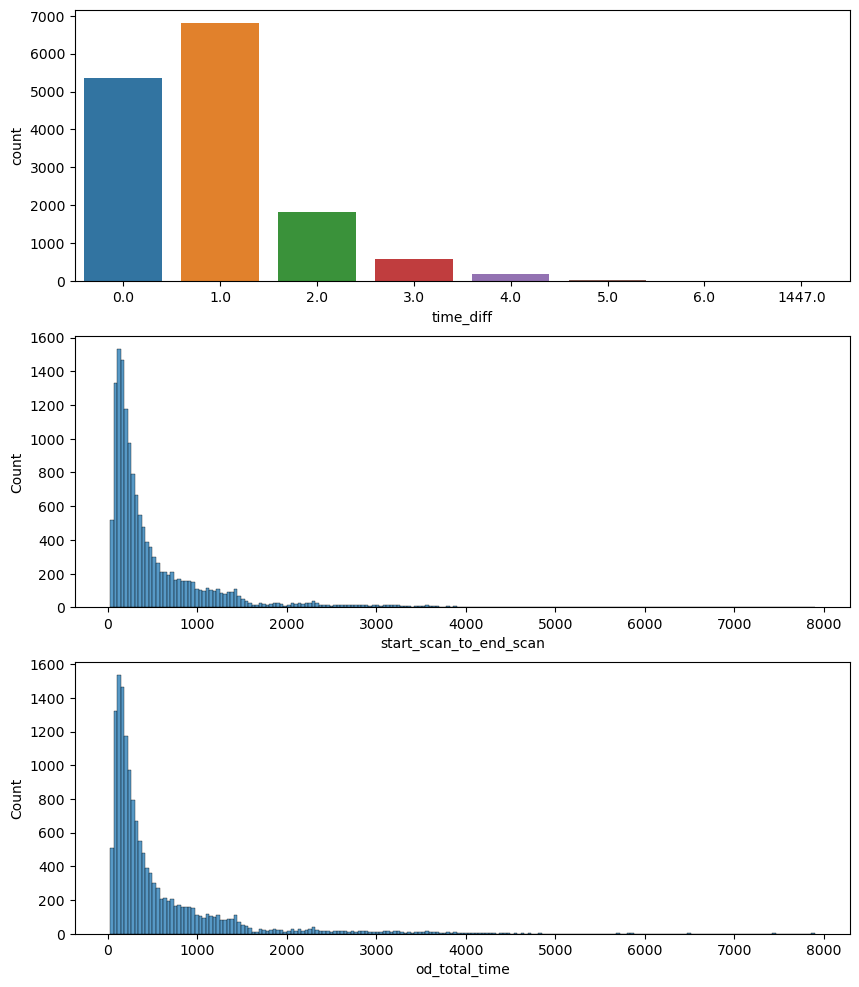

In [36]:
plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=df2, x='time_diff')

plt.subplot(3,1,2)
sns.histplot(data=df2, x='start_scan_to_end_scan')

plt.subplot(3,1,3)
sns.histplot(data=df2, x='od_total_time')

In [37]:
# Ho- There is no significant difference between the total order time and start to end scan time
# Ha- There is significant difference between the total order time and start to end scan time

t_val, p_val=ttest_ind(df2['od_total_time'],df2['start_scan_to_end_scan'])
print('t_stat :',t_val)
print('p_value :',p_val)
if p_val<0.05:
    print('Reject Ho')
    print('At 5% significance- There is significant difference between the total order time and start to end scan time')
else:
    print('Fail to Reject Ho')
    print('At 5% significance- There is no significant difference between the total order time and start to end scan time')

t_stat : 0.1289376461950863
p_value : 0.8974078630085536
Fail to Reject Ho
At 5% significance- There is no significant difference between the total order time and start to end scan time


### 3. Actual_time aggregated value vs OSRM time aggregated value

In [38]:
df2[['actual_time','osrm_time']]

,actual_time,osrm_time
0,1562.0,717.0
1,143.0,68.0
2,3347.0,1740.0
3,59.0,15.0
4,341.0,117.0
...,...,...
14812,83.0,62.0
14813,21.0,12.0
14814,282.0,48.0
14815,264.0,179.0


In [39]:
df2[['actual_time', 'osrm_time']].describe()

,actual_time,osrm_time
count,14817.000000,14817.000000
mean,357.143754,161.384018
std,561.396157,271.360995
min,9.000000,6.000000
25%,67.000000,29.000000
50%,149.000000,60.000000
75%,370.000000,168.000000
max,6265.000000,2032.000000


<AxesSubplot:xlabel='osrm_time', ylabel='Count'>

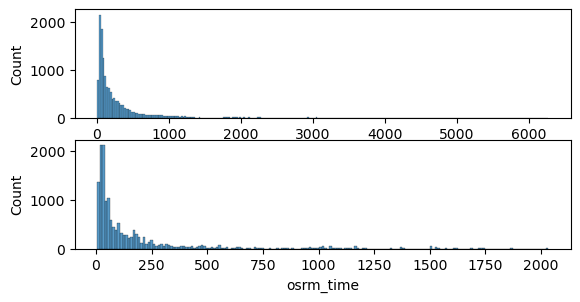

In [40]:
plt.subplot(3,1,2)
sns.histplot(data=df2, x='actual_time')

plt.subplot(3,1,3)
sns.histplot(data=df2, x='osrm_time')

In [41]:
# Ho- There is no significant difference between the actual_time and osrm_time
# Ha- There is significant difference between the actual_time and osrm_time

t_val, p_val=ttest_ind(df2['actual_time'],df2['osrm_time'])
print('t_stat :',t_val)
print('p_value :',p_val)
if p_val<0.05:
    print('Reject Ho')
    print('At 5% significance- There is significant difference between the actual_time and osrm_time')
else:
    print('Fail to Reject Ho')
    print('At 5% significance- There is no significant difference between the actual_time and osrm_time')

t_stat : 38.215453905833165
p_value : 0.0
Reject Ho
At 5% significance- There is significant difference between the actual_time and osrm_time


### 4. Actual_time aggregated value vs Segment actual time aggregated value

In [42]:
df2[['actual_time','segment_actual_time']]

,actual_time,segment_actual_time
0,1562.0,1548.0
1,143.0,141.0
2,3347.0,3308.0
3,59.0,59.0
4,341.0,340.0
...,...,...
14812,83.0,82.0
14813,21.0,21.0
14814,282.0,281.0
14815,264.0,258.0


In [43]:
df2[['actual_time', 'segment_actual_time']].describe()

,actual_time,segment_actual_time
count,14817.000000,14817.000000
mean,357.143754,353.892286
std,561.396157,556.247965
min,9.000000,9.000000
25%,67.000000,66.000000
50%,149.000000,147.000000
75%,370.000000,367.000000
max,6265.000000,6230.000000


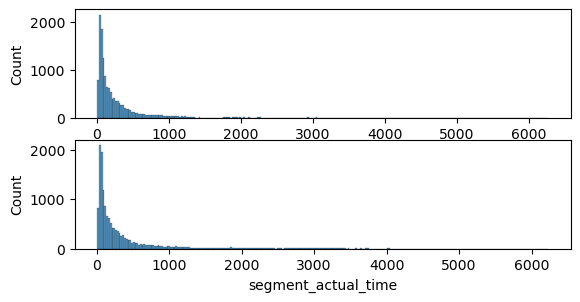

In [44]:
plt.subplot(3,1,2)
sns.histplot(data=df2, x='actual_time')

plt.subplot(3,1,3)
sns.histplot(data=df2, x='segment_actual_time')
plt.show()

In [45]:
# Ho- There is no significant difference between the actual_time and segment_actual_time
# Ha- There is significant difference between the actual_time and segment_actual_time

t_val, p_val=ttest_ind(df2['actual_time'],df2['segment_actual_time'])
print('t_stat :',t_val)
print('p_value :',p_val)
if p_val<0.05:
    print('Reject Ho')
    print('At 5% significance- There is significant difference between the actual_time and segment_actual_time')
else:
    print('Fail to Reject Ho')
    print('At 5% significance- There is no significant difference between the actual_time and segment_actual_time')

t_stat : 0.5008024728897531
p_value : 0.6165138648224772
Fail to Reject Ho
At 5% significance- There is no significant difference between the actual_time and segment_actual_time


### 5. Osrm distance aggregated value and segment osrm distance aggregated value

In [46]:
df2[['osrm_distance','segment_osrm_distance']].head()

,osrm_distance,segment_osrm_distance
0,991.3523,1320.4733
1,85.1110,84.1894
2,2354.0665,2545.2678
3,19.6800,19.8766
4,146.7918,146.7919


In [47]:
df2[['osrm_distance', 'segment_osrm_distance']].describe()

,osrm_distance,segment_osrm_distance
count,14817.000000,14817.000000
mean,204.344689,223.201161
std,370.395573,416.628374
min,9.072900,9.072900
25%,30.819200,32.654500
50%,65.618800,70.154400
75%,208.475000,218.802400
max,2840.081000,3523.632400


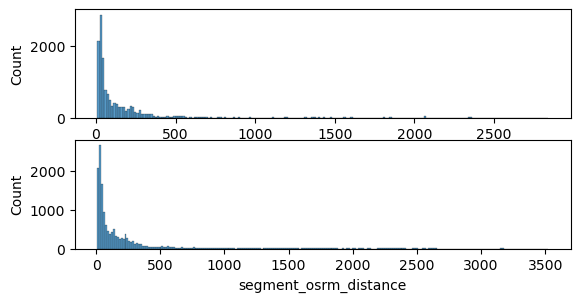

In [48]:
plt.subplot(3,1,2)
sns.histplot(data=df2, x='osrm_distance')

plt.subplot(3,1,3)
sns.histplot(data=df2, x='segment_osrm_distance')
plt.show()

In [49]:
# Ho- There is no significant difference between the osrm_distance and segment_osrm_distance
# Ha- There is significant difference between the osrm_distance and segment_osrm_distance
t_val, p_val=ttest_ind(df2['osrm_distance'],df2['segment_osrm_distance'])
print('t_stat :',t_val)
print('p_value :',p_val)
if p_val<0.05:
    print('Reject Ho')
    print('At 5% significance- There is significant difference between the osrm_distance and segment_osrm_distance')
else:
    print('Fail to Reject Ho')
    print('At 5% significance- There is no significant difference between the osrm_distance and segment_osrm_distance')

t_stat : -4.117367046483823
p_value : 3.842631473353718e-05
Reject Ho
At 5% significance- There is significant difference between the osrm_distance and segment_osrm_distance


### 6. Osrm time aggregated value and segment osrm time aggregated value

In [50]:
df2[['osrm_time','segment_osrm_time']].head()

,osrm_time,segment_osrm_time
0,717.0,1008.0
1,68.0,65.0
2,1740.0,1941.0
3,15.0,16.0
4,117.0,115.0


In [51]:
df2[['osrm_time', 'segment_osrm_time']].describe()

,osrm_time,segment_osrm_time
count,14817.000000,14817.000000
mean,161.384018,180.949787
std,271.360995,314.542047
min,6.000000,6.000000
25%,29.000000,31.000000
50%,60.000000,65.000000
75%,168.000000,185.000000
max,2032.000000,2564.000000


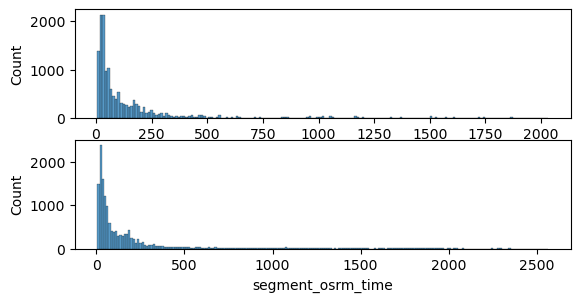

In [52]:
plt.subplot(3,1,2)
sns.histplot(data=df2, x='osrm_time')

plt.subplot(3,1,3)
sns.histplot(data=df2, x='segment_osrm_time')
plt.show()

In [53]:
# Ho- There is no significant difference between the osrm_time and segment_osrm_time
# Ha- There is significant difference between the osrm_time and segment_osrm_time
t_val, p_val=ttest_ind(df2['osrm_time'],df2['segment_osrm_time'])
print('t_stat :',t_val)
print('p_value :',p_val)
if p_val<0.05:
    print('Reject Ho')
    print('At 5% significance- There is significant difference between the osrm_time and segment_osrm_time')
else:
    print('Fail to Reject Ho')
    print('At 5% significance- There is no significant difference between the osrm_time and segment_osrm_time')

t_stat : -5.733106696963521
p_value : 9.956426798219171e-09
Reject Ho
At 5% significance- There is significant difference between the osrm_time and segment_osrm_time


## Outliers in the numerical variables

In [54]:
num_colums=df2.describe()
num_colums.columns

Index(['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'od_total_time', 'Year',
       'Month', 'Day', 'week_day', 'Hour', 'time_diff'],
      dtype='object')

<AxesSubplot:ylabel='time_diff'>

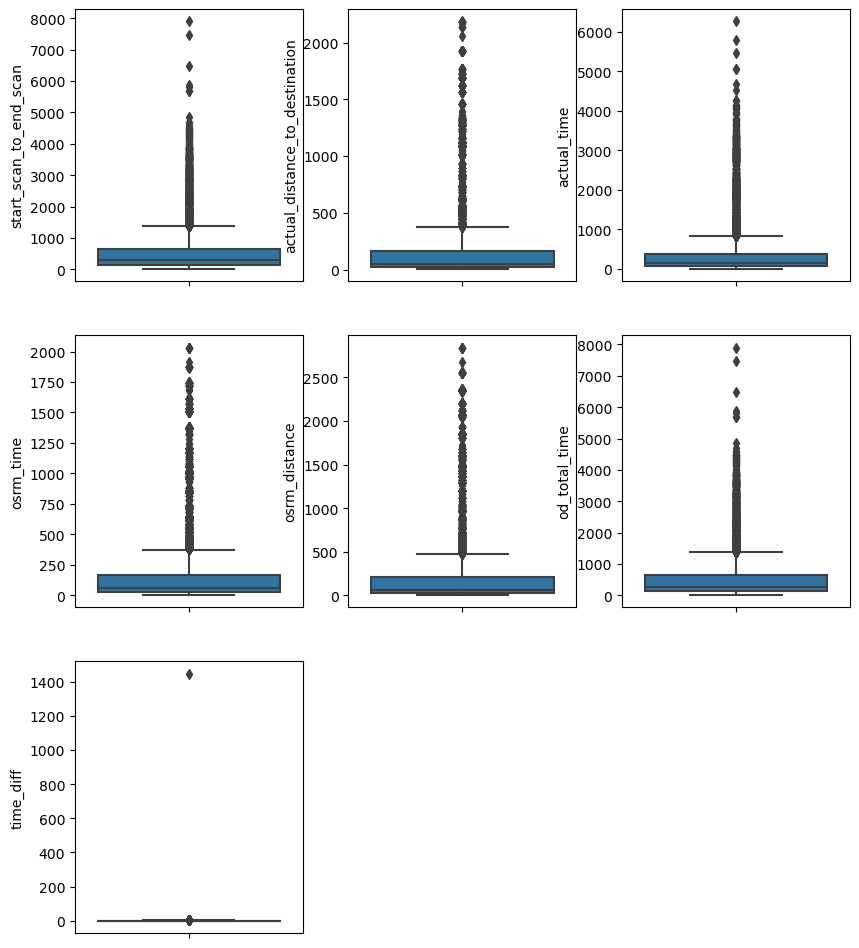

In [55]:
plt.figure(figsize=(10,12))
plt.subplot(3,3,1)
sns.boxplot(data=df2, y='start_scan_to_end_scan')

plt.subplot(3,3,2)
sns.boxplot(data=df2, y='actual_distance_to_destination')

plt.subplot(3,3,3)
sns.boxplot(data=df2, y='actual_time')

plt.subplot(3,3,4)
sns.boxplot(data=df2, y='osrm_time')

plt.subplot(3,3,5)
sns.boxplot(data=df2, y='osrm_distance')

plt.subplot(3,3,6)
sns.boxplot(data=df2, y='od_total_time')

plt.subplot(3,3,7)
sns.boxplot(data=df2, y='time_diff')

In [56]:
# The data contains outliers in all of the numercial features
# Mojority of outliers are above the 75th percentile

## Handling the outliers using the IQR method

In [57]:
for i in num_colums:
    IQR=np.percentile(df2[i],75)-np.percentile(df2[i],25)
    Upper_whisker=(np.percentile(df2[i],75)+(1.5*IQR))
    Lower_whisker=max((np.percentile(df2[i],25)-(1.5*IQR), min(df2[i])))
    df2=df2[df2[i]<=Upper_whisker]

<AxesSubplot:ylabel='time_diff'>

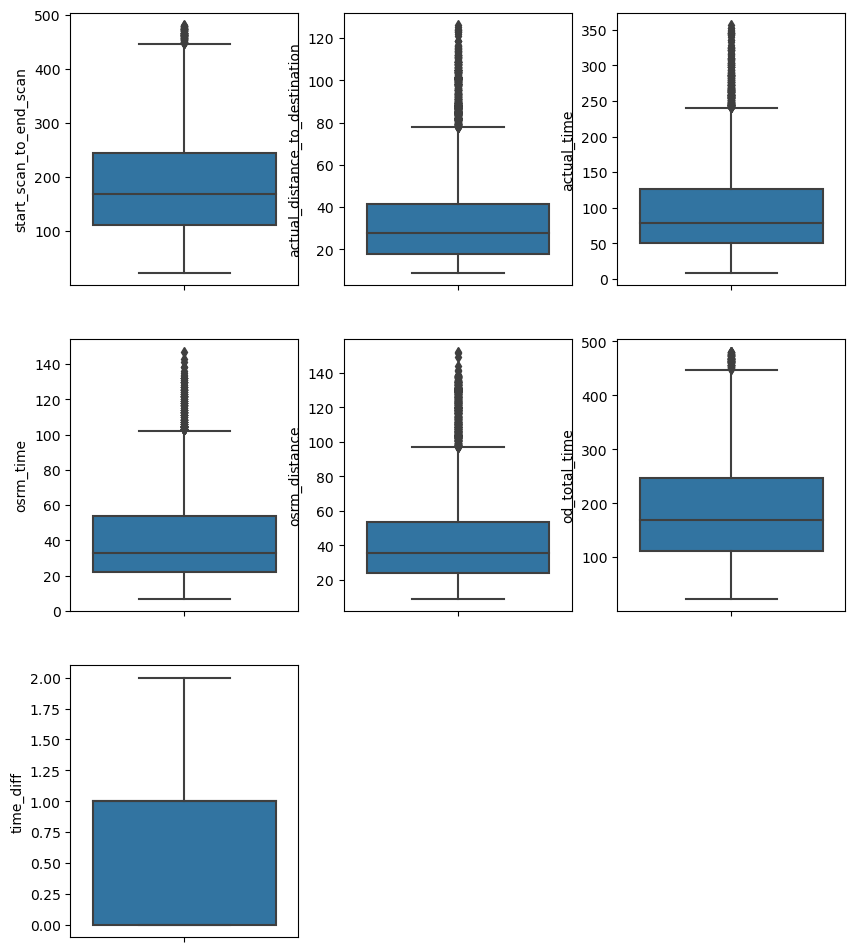

In [58]:
plt.figure(figsize=(10,12))
plt.subplot(3,3,1)
sns.boxplot(data=df2, y='start_scan_to_end_scan')

plt.subplot(3,3,2)
sns.boxplot(data=df2, y='actual_distance_to_destination')

plt.subplot(3,3,3)
sns.boxplot(data=df2, y='actual_time')

plt.subplot(3,3,4)
sns.boxplot(data=df2, y='osrm_time')

plt.subplot(3,3,5)
sns.boxplot(data=df2, y='osrm_distance')

plt.subplot(3,3,6)
sns.boxplot(data=df2, y='od_total_time')

plt.subplot(3,3,7)
sns.boxplot(data=df2, y='time_diff')

In [59]:
# Even after using IQR method, the outliers are still present in the data.
# But the max values have come down considierably

In [60]:
df2.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_total_time,Year,Month,Day,week_day,Hour,time_diff
count,7626.000000,7626.000000,7626.000000,7626.000000,7626.000000,7626.000000,7626.000000,7626.000000,7626.000000,7626.0,7626.0,7626.000000,7626.000000,7626.000000,7626.000000
mean,185.517834,34.348979,95.646735,40.241280,44.048129,94.654472,43.248623,46.854042,186.131917,2018.0,9.0,20.572122,3.193024,11.884474,0.614083
std,95.936743,23.652170,61.482178,24.745185,29.338824,61.101421,27.210949,30.423834,96.009991,0.0,0.0,5.428701,1.877839,7.966431,0.589442
min,23.000000,9.002461,9.000000,7.000000,9.072900,9.000000,7.000000,9.072900,23.000000,2018.0,9.0,12.000000,0.000000,0.000000,0.000000
25%,111.000000,17.582339,50.000000,22.000000,23.993225,50.000000,22.000000,25.153600,112.000000,2018.0,9.0,16.000000,2.000000,4.000000,0.000000
50%,168.500000,27.607405,78.000000,33.000000,35.700000,77.000000,35.000000,37.910550,169.000000,2018.0,9.0,20.000000,3.000000,13.000000,1.000000
75%,245.000000,41.675118,126.000000,54.000000,53.280325,125.000000,58.000000,60.182400,246.000000,2018.0,9.0,25.000000,5.000000,20.000000,1.000000
max,480.000000,125.988118,356.000000,147.000000,152.418500,352.000000,148.000000,138.730300,481.000000,2018.0,9.0,30.000000,6.000000,23.000000,2.000000


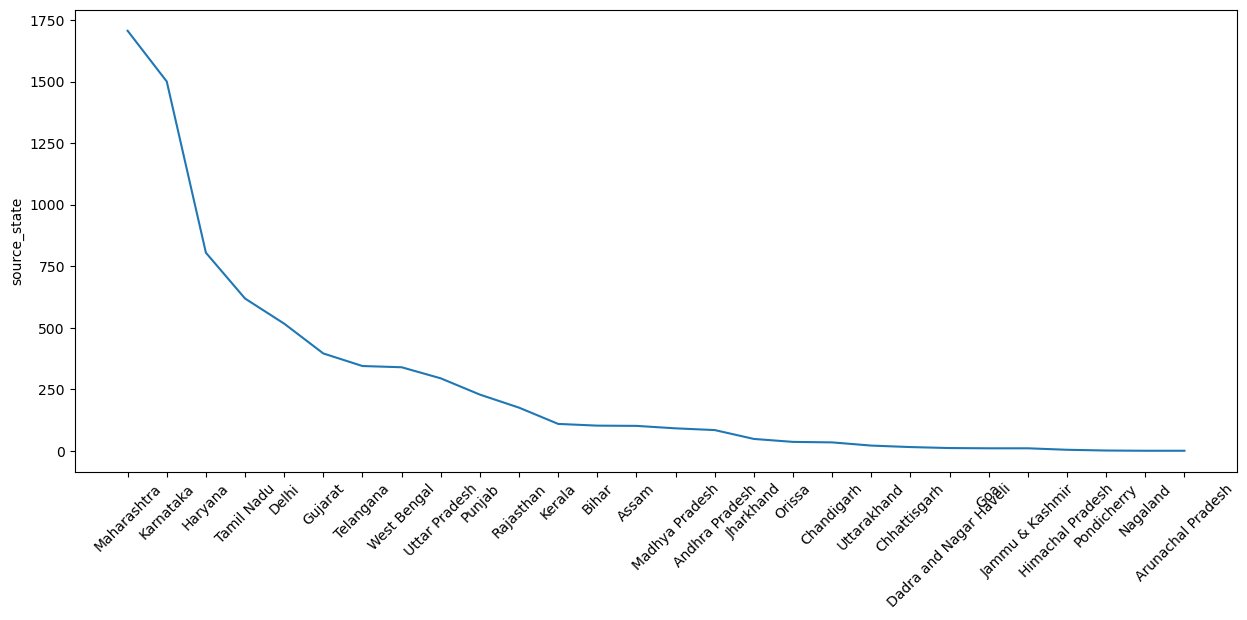

In [61]:
# No of trips from each states

plt.figure(figsize = (15, 6))
d1=df2['source_state'].value_counts()
x1=d1.index
y1=d1
sns.lineplot(x=x1, y=y1)
plt.xticks(rotation=45)
plt.show() 

In [62]:
# Most order are from Maharastra followed by Karanataka
# Least orders by Pondicherry followed by Himacha Pradesh

In [63]:
df2['source_city'].value_counts().head(10).reset_index()

,index,source_city
0,Bengaluru,874
1,Mumbai,492
2,Bangalore,453
3,Gurgaon,452
4,Bhiwandi,438
5,Delhi,362
6,Hyderabad,282
7,Chennai,264
8,Pune,257
9,Mumbai Hub (Maharashtra),250


<AxesSubplot:xlabel='Year', ylabel='count'>

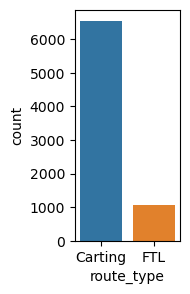

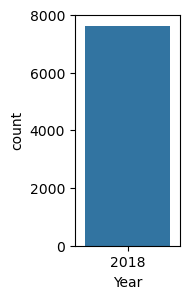

In [64]:
# No of trips from each states
plt.figure(figsize=(3,3))
plt.subplot(1,2,1)
sns.countplot(data=df2, x='route_type')

#No of order by Year
plt.figure(figsize=(3,3))
plt.subplot(1,2,2)
sns.countplot(data=df2, x='Year')

In [65]:
# The df contains data from 2018 only
# Most order are of Carting

<AxesSubplot:xlabel='week_day', ylabel='count'>

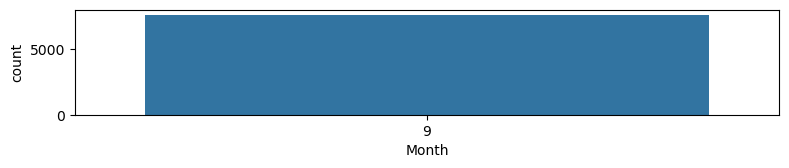

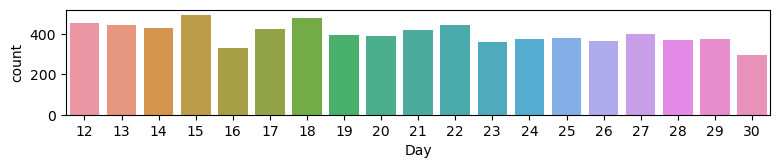

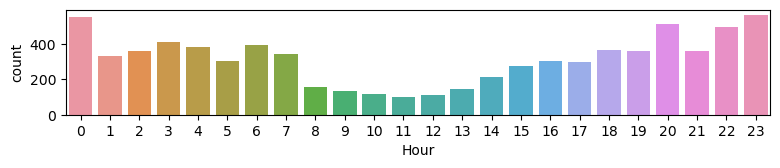

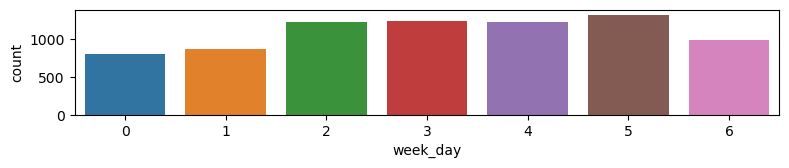

In [66]:
# No of trips from during each Day
plt.figure(figsize=(20,3))
plt.subplot(2,2,1)
sns.countplot(data=df2, x='Month')

# No of trips from during each Hour
plt.figure(figsize=(20,3))
plt.subplot(2,2,2)
sns.countplot(data=df2, x='Day')

# No of trips from during each Hour
plt.figure(figsize=(20,3))
plt.subplot(2,2,3)
sns.countplot(data=df2, x='Hour')

# No of trips from during each Hour
plt.figure(figsize=(20,3))
plt.subplot(2,2,4)
sns.countplot(data=df2, x='week_day')

In [67]:
# All the orders are from september month
# The given data contains data from 12th to 30th of the month
# Most orders are created during midnight and early mornings and least during afternoons
# There were equal no of order on all days of the week except Sundays and Mondays

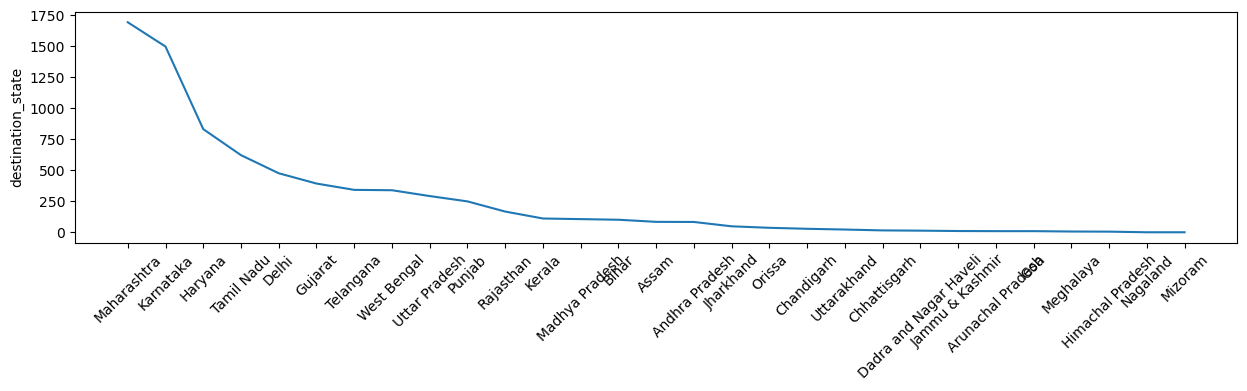

In [68]:
# No of trips to each states
plt.figure(figsize = (15, 3))
d1=df2['destination_state'].value_counts()
x1=d1.index
y1=d1
sns.lineplot(x=x1, y=y1)
plt.xticks(rotation=45)
plt.show()

In [69]:
# Most  trips ended in Maharashtra followed by Karnataka, Haryana, Tamil Nadu and Uttar Pradesh.
# Least on Mizoram and Himachal Pradesh

In [70]:
df2['destination_city'].value_counts().head(10).reset_index()

,index,destination_city
0,Bengaluru,914
1,Mumbai,735
2,Delhi,389
3,Gurgaon,347
4,Bhiwandi,323
5,Chennai,321
6,Bangalore,319
7,Hyderabad,274
8,Mumbai Hub (Maharashtra),203
9,Pune,189


In [71]:
# Most orders are from Bengaluru, Mumbai and Delhi

### One-hot encoding of categorical variables (like route_type)

In [72]:
# one-hot encoding for 'route_type'

In [73]:
df2['route_type'].value_counts()

Carting    6556
FTL        1070
Name: route_type, dtype: int64

In [74]:
df2['route_type']=LabelEncoder().fit_transform(df2['route_type'])
df2['route_type'].value_counts()

0    6556
1    1070
Name: route_type, dtype: int64

In [75]:
# # one-hot encoding for 'data' 

In [76]:
df2['data'].value_counts()

training    6187
test        1439
Name: data, dtype: int64

In [77]:
df2['data']=LabelEncoder().fit_transform(df2['data'])
df2['data'].value_counts()

1    6187
0    1439
Name: data, dtype: int64

### Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

### 1. standardization of start_scan_to_end_scan with MinMaxScaler()

In [78]:
# info before standardization with MinMaxScaler()
df2['start_scan_to_end_scan'].describe()

count    7626.000000
mean      185.517834
std        95.936743
min        23.000000
25%       111.000000
50%       168.500000
75%       245.000000
max       480.000000
Name: start_scan_to_end_scan, dtype: float64

In [79]:
df2['start_scan_to_end_scan']=MinMaxScaler().fit_transform(df2['start_scan_to_end_scan'].to_numpy().reshape(-1, 1))

# info after standardization with MinMaxScaler()
df2['start_scan_to_end_scan'].describe()

count    7626.000000
mean        0.355619
std         0.209927
min         0.000000
25%         0.192560
50%         0.318381
75%         0.485777
max         1.000000
Name: start_scan_to_end_scan, dtype: float64

### 2. standardization of actual_distance_to_destination with MinMaxScaler()

In [80]:
# info before standardization
df2['actual_distance_to_destination'].describe()

count    7626.000000
mean       34.348979
std        23.652170
min         9.002461
25%        17.582339
50%        27.607405
75%        41.675118
max       125.988118
Name: actual_distance_to_destination, dtype: float64

In [81]:
df2['actual_distance_to_destination']=MinMaxScaler().fit_transform(df2['actual_distance_to_destination'].to_numpy().reshape(-1, 1))

# info after standardization with MinMaxScaler()
df2['actual_distance_to_destination'].describe()

count    7626.000000
mean        0.216663
std         0.202180
min         0.000000
25%         0.073341
50%         0.159036
75%         0.279288
max         1.000000
Name: actual_distance_to_destination, dtype: float64

### 3. standardization of actual_time with MinMaxScaler()

In [82]:
# info before standardization
df2['actual_time'].describe()

count    7626.000000
mean       95.646735
std        61.482178
min         9.000000
25%        50.000000
50%        78.000000
75%       126.000000
max       356.000000
Name: actual_time, dtype: float64

In [83]:
df2['actual_time']=MinMaxScaler().fit_transform(df2['actual_time'].to_numpy().reshape(-1, 1))

# info after standardization with MinMaxScaler()
df2['actual_time'].describe()

count    7626.000000
mean        0.249702
std         0.177182
min         0.000000
25%         0.118156
50%         0.198847
75%         0.337176
max         1.000000
Name: actual_time, dtype: float64

### 4. standardization of osrm_time with MinMaxScaler()

In [84]:
# info before standardization
df2['osrm_time'].describe()

count    7626.000000
mean       40.241280
std        24.745185
min         7.000000
25%        22.000000
50%        33.000000
75%        54.000000
max       147.000000
Name: osrm_time, dtype: float64

In [85]:
df2['osrm_time']=MinMaxScaler().fit_transform(df2['osrm_time'].to_numpy().reshape(-1, 1))

# info after standardization with MinMaxScaler()
df2['osrm_time'].describe()

count    7626.000000
mean        0.237438
std         0.176751
min         0.000000
25%         0.107143
50%         0.185714
75%         0.335714
max         1.000000
Name: osrm_time, dtype: float64

### 5. standardization of osrm_distance with MinMaxScaler()

In [86]:
# info before standardization
df2['osrm_distance'].describe()

count    7626.000000
mean       44.048129
std        29.338824
min         9.072900
25%        23.993225
50%        35.700000
75%        53.280325
max       152.418500
Name: osrm_distance, dtype: float64

In [87]:
df2['osrm_distance']=MinMaxScaler().fit_transform(df2['osrm_distance'].to_numpy().reshape(-1, 1))

# info after standardization with MinMaxScaler()
df2['osrm_distance'].describe()

count    7626.000000
mean        0.243992
std         0.204672
min         0.000000
25%         0.104086
50%         0.185755
75%         0.308398
max         1.000000
Name: osrm_distance, dtype: float64

### 6. standardization of segment_actual_time with MinMaxScaler()

In [88]:
# info before standardization
df2['segment_actual_time'].describe()

count    7626.000000
mean       94.654472
std        61.101421
min         9.000000
25%        50.000000
50%        77.000000
75%       125.000000
max       352.000000
Name: segment_actual_time, dtype: float64

In [89]:
df2['segment_actual_time']=MinMaxScaler().fit_transform(df2['segment_actual_time'].to_numpy().reshape(-1, 1))

# info after standardization with MinMaxScaler()
df2['segment_actual_time'].describe()

count    7626.000000
mean        0.249721
std         0.178138
min         0.000000
25%         0.119534
50%         0.198251
75%         0.338192
max         1.000000
Name: segment_actual_time, dtype: float64

### 7. standardization of segment_osrm_time with MinMaxScaler()

In [90]:
# info before standardization
df2['segment_osrm_time'].describe()

count    7626.000000
mean       43.248623
std        27.210949
min         7.000000
25%        22.000000
50%        35.000000
75%        58.000000
max       148.000000
Name: segment_osrm_time, dtype: float64

In [91]:
df2['segment_osrm_time']=MinMaxScaler().fit_transform(df2['segment_osrm_time'].to_numpy().reshape(-1, 1))

# info after standardization with MinMaxScaler()
df2['segment_osrm_time'].describe()

count    7626.000000
mean        0.257082
std         0.192985
min         0.000000
25%         0.106383
50%         0.198582
75%         0.361702
max         1.000000
Name: segment_osrm_time, dtype: float64

### 8. standardization of segment_osrm_distance with MinMaxScaler()

In [92]:
# info before standardization
df2['segment_osrm_distance'].describe()

count    7626.000000
mean       46.854042
std        30.423834
min         9.072900
25%        25.153600
50%        37.910550
75%        60.182400
max       138.730300
Name: segment_osrm_distance, dtype: float64

In [93]:
df2['segment_osrm_distance']=MinMaxScaler().fit_transform(df2['segment_osrm_distance'].to_numpy().reshape(-1, 1))

# info after standardization with MinMaxScaler()
df2['segment_osrm_distance'].describe()

count    7626.000000
mean        0.291392
std         0.234648
min         0.000000
25%         0.124025
50%         0.222414
75%         0.394189
max         1.000000
Name: segment_osrm_distance, dtype: float64

### 9. standardization of od_total_time with MinMaxScaler()

In [94]:
# info before standardization
df2['od_total_time'].describe()

count    7626.000000
mean      186.131917
std        96.009991
min        23.000000
25%       112.000000
50%       169.000000
75%       246.000000
max       481.000000
Name: od_total_time, dtype: float64

In [95]:
df2['od_total_time']=MinMaxScaler().fit_transform(df2['od_total_time'].to_numpy().reshape(-1, 1))

# info after standardization with MinMaxScaler()
df2['od_total_time'].describe()

count    7626.000000
mean        0.356183
std         0.209629
min         0.000000
25%         0.194323
50%         0.318777
75%         0.486900
max         1.000000
Name: od_total_time, dtype: float64

In [96]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7626 entries, 1 to 13027
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       7626 non-null   object        
 1   data                            7626 non-null   int32         
 2   trip_creation_time              7626 non-null   datetime64[ns]
 3   route_schedule_uuid             7626 non-null   object        
 4   route_type                      7626 non-null   int32         
 5   source_name                     7626 non-null   object        
 6   destination_name                7626 non-null   object        
 7   start_scan_to_end_scan          7626 non-null   float64       
 8   actual_distance_to_destination  7626 non-null   float64       
 9   actual_time                     7626 non-null   float64       
 10  osrm_time                       7626 non-null   float64       
 11  osr

In [97]:
# Insights

# -The data is given from the period '2018-09-12 00:00:16' to '2018-10-08 03:00:24'.
# -Most common route type is Carting.
# -Most of the data is for testing than for training
# -The majority trips are initiated in early morning then reduce by noon and again increases by night.
# -The source and destination for majority orders are Maharashtra, karnataka, Haryana and Tamil Nadu respectively
# -Least orders are from pondicherry followed by Himachal Pradesh
# -Majority order flow in from Bengaluru, Mumbai, Gurgaon respec and major deliveries are in Bengaluru, Mumbai and Delhi respec.
# -There are huge amount of outliers laying on the upper side of the whiskers in numercial features
# -There are orders taking unsually long time to get delivered, hence huge number of outliers
# -The average minutes for order deliver is 530 minutes.
# -The average difference of time between total order time and start-to-end-scan is 0.98 minutes
# -At 5% significance- 
#    -There is no significant difference between the total order time and start to end scan time.
#    -There is significant difference between the actual_time and osrm_time
#    -There is no significant difference between the actual_time and segment_actual_time
#    -There is significant difference between the osrm_distance and segment_osrm_distance
#    -There is significant difference between the osrm_time and segment_osrm_time

In [98]:
# Recommendations

# -The overall time for delivery needs to be improved as there is a signicant difference with OSMR time. Root cause analysis to be done to identify where the actual time is exceeding the OSMR time.
# -Since there is difference between OSRM distance/time and segment OSMR distance/time, the engine has to be checked for any discrepancies.
# -Majority orders are following in and out of Maharastra, Karanataka etc..So more pan power and improved logitics can support for faster deliveries and better service.
# -The no of orders reduce by afternoon- a Root cause analysis can be done to understand why this unsuall trend is happening.
# -Categorizing the orders by type, size etc can be utilized fpr better carting since majority orders are carting. This will optimize space and help in reducing cost.